In [4]:
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d

In [11]:
with open('../docs/data/dummy_chromatin_str.txt','r') as in_file:
    lines = in_file.readlines()

In [12]:
x = []
y = []
z = []

#I'm dropping decimal values 
for line in lines[1:]:
    l_ = line.split("\t")
    x.append(math.ceil(float(l_[2])))
    y.append(math.ceil(float(l_[3])))
    z.append(math.ceil(float(l_[4])))

In [13]:
x_min = min(x)
y_min = min(y)
x_max = max(x)
y_max = max(y)

print(x_min)
print(y_min)
print(x_max)
print(y_max)
print(len(x))

-50
-32
230
243
58781


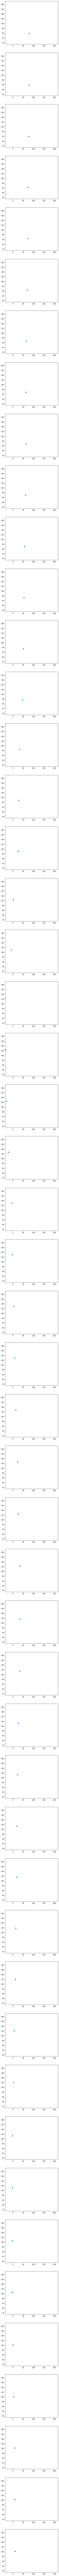

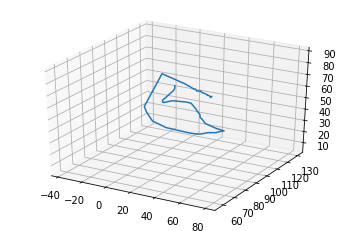

In [42]:
fig,ax = plt.subplots(ncols=1,nrows=50,figsize=(6,300))
for i in range(50):
    ax[i].scatter(x[i],y[i])
    ax[i].set_xlim([x_min, x_max])
    ax[i].set_ylim([y_min, y_max])
    
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x[0:50], y[0:50], z[0:50])



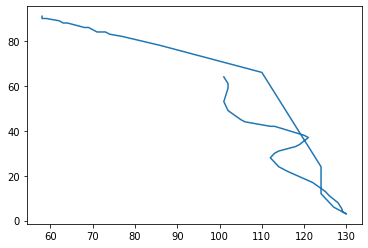

In [43]:
plt.plot(y[:50],z[0:50])

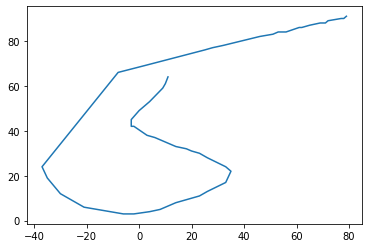

In [44]:
plt.plot(x[:50],z[0:50])

In [46]:
%matplotlib tk

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x[0:50], y[0:50], z[0:50])


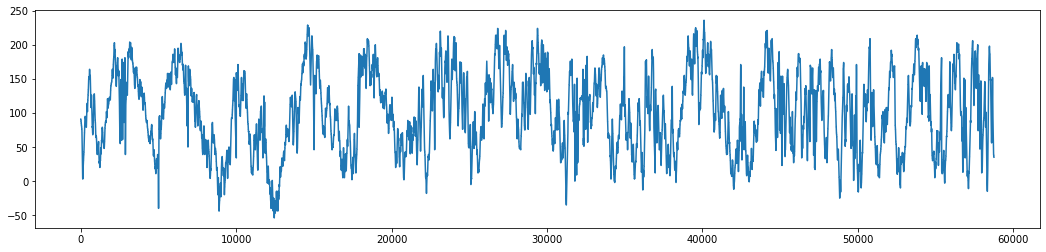

In [17]:
fig,ax = plt.subplots(figsize=(18,4))
ax.plot(z)
plt.show()

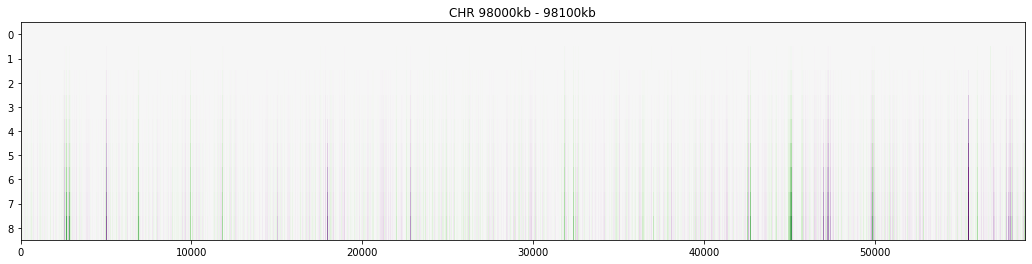

In [30]:
from scipy import signal
import numpy as np

from scipy.fftpack import fft
from scipy.optimize import leastsq

widths = np.arange(1, 10)
cwtmatr = signal.cwt(z, signal.ricker, widths)

fig,ax = plt.subplots(figsize=(18,4))
ax.set_title('CHR 98000kb - 98100kb')
ax.imshow(cwtmatr, cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

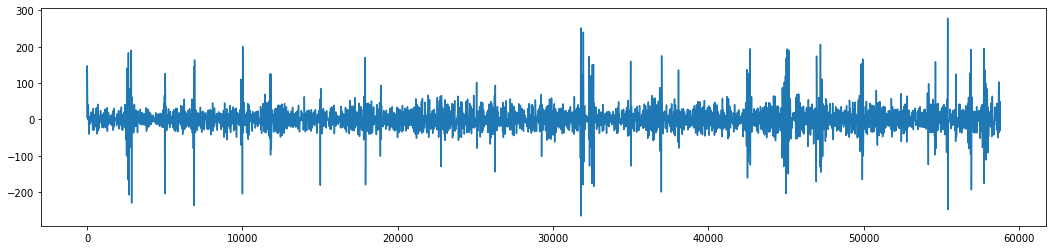

In [25]:
fig,ax = plt.subplots(figsize=(18,4))
ax.plot(cwtmatr[8])
plt.show()

/Users/kumar/kumar/ChrVis/env/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


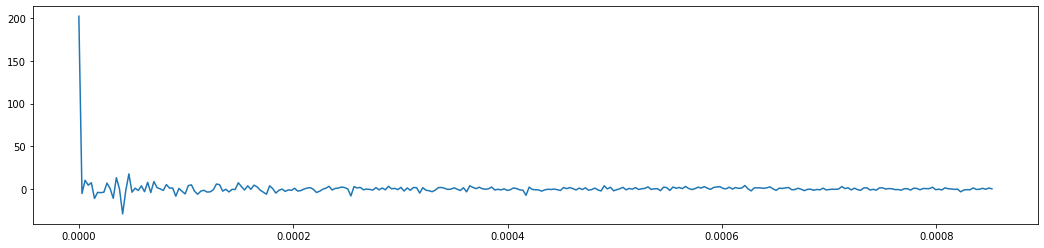

In [49]:
xf = np.linspace(0.0, 1.0/(2.0*587), 587//2)
yf = fft(z)

fig,ax = plt.subplots(figsize=(18,4))
ax.plot(xf, 2.0/58781 * yf[0:587//2])
plt.show()

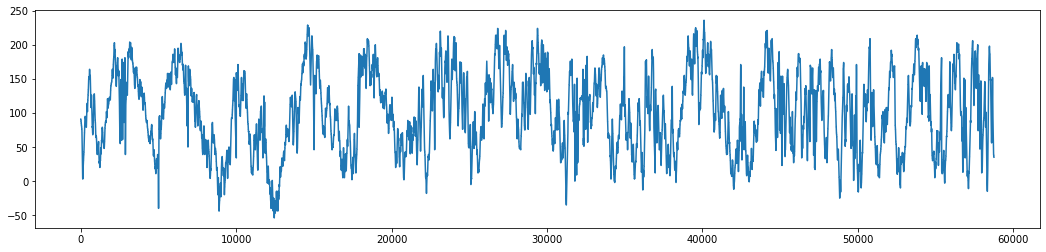

In [42]:
fig,ax = plt.subplots(figsize=(18,4))
ax.plot(z)
plt.show()

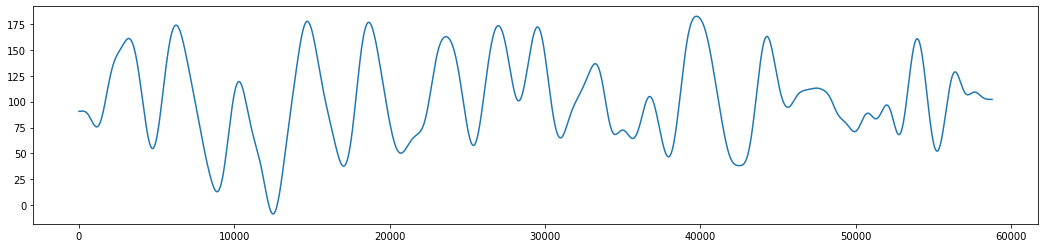

In [44]:
import scipy.signal as signal

# First, design the Buterworth filter
N  = 3    # Filter order
Wn = 0.001 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
smooth_data = signal.filtfilt(B,A, z)

fig,ax = plt.subplots(figsize=(18,4))
ax.plot(smooth_data)
plt.show()

## calculate length vector

In [45]:
import math
len_ = [math.sqrt(x[i]*x[i] + y[i]*y[i] + z[i]*z[i]) for i in range(len(x)) ] 

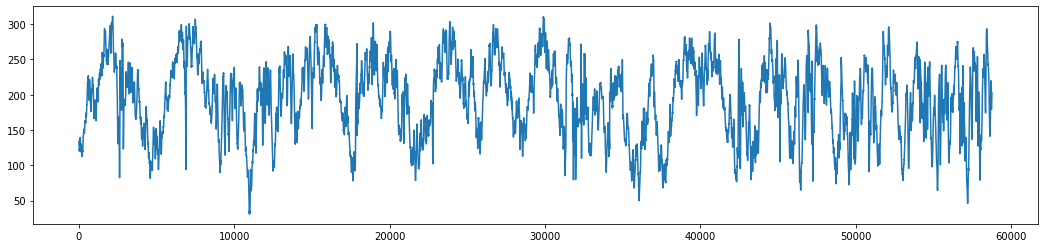

In [47]:
fig,ax = plt.subplots(figsize=(18,4))
ax.plot(len_)
plt.show()

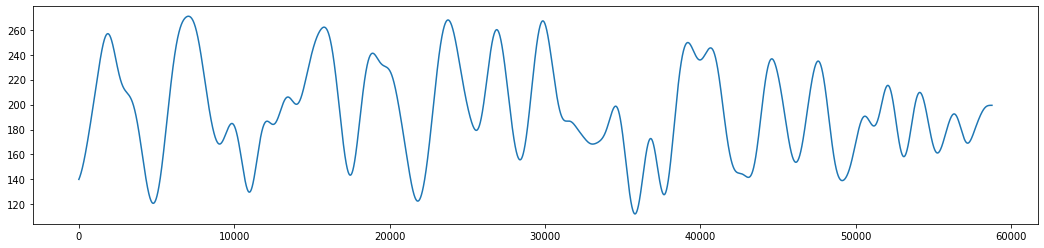

In [48]:
import scipy.signal as signal

# First, design the Buterworth filter
N  = 3    # Filter order
Wn = 0.001 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
smooth_data = signal.filtfilt(B,A, len_)

fig,ax = plt.subplots(figsize=(18,4))
ax.plot(smooth_data)
plt.show()